# **Food Commodity Prices Analysis and Forecasting in Kenya**

**By:** Charles Kagwanja   **|**   Kevin Kagia  |   Lucy Njambi  | 
 Mwenda Mugambi



---


## **Introduction and Project Overview**
This project analyzes and predicts basic food commodity prices in Kenya. By delving into historical data, the initiative seeks to uncover trends and influencing factors, developing predictive models for informed decision-making. Focused on addressing poverty and food security challenges, the project holds potential for significant contributions to agricultural planning, budgeting, and policy formulation. Its success could play a pivotal role in poverty alleviation, improved nutrition, and progress towards the UN Sustainable Development Goal of zero hunger in Kenya.

## **Business Understanding**

In Kenya, where 35.6% live below the international poverty line, challenges include 29% of rural children experiencing stunted growth. With a total population of 48.5 million, securing nutritious food remains a struggle for many. Addressing a third of the population's difficulty in accessing quality food is crucial, aligning with the global goal of zero hunger.

This project responds to these challenges, aiming to provide actionable insights into food commodity price trends and future predictions in Kenya. By employing data science and time series forecasting, the initiative seeks to contribute to more stable and predictable food markets in the country.

### Project Objectives
- **Analyzing Price Trends and Seasonality**: Gain an in-depth understanding of the dynamics of food prices in Kenya by analyzing historical patterns and seasonality across different markets.

- **Predictive Modelling**:Develop reliable predictive models to forecast future commodity prices, enhancing the capacity for informed decision-making.

- **Regional variations analysis**:Examine regional variations in food prices across diverse areas of Kenya, providing insights into market dynamics that impact consumers, retailers, and farmers.

- **Decision Support System**:Provide informed recommendations to policymakers and stakeholders, addressing challenges related to food affordability and accessibility based on the analyzed data and predictive models.

- Contribute to effective agricultural planning and policy formulation by identifying historical trends, regional variations,   and forecasting future prices, ultimately supporting progress towards poverty alleviation and achieving zero hunger in Kenya.

### Why This Project Matters

1. **Economic Impact on Farmers and Producers**: Empowering farmers with the knowledge of future price trends, which can guide their crop production and marketing strategies.

2. **Consumer Protection and Budgeting**: Assisting consumers, especially in lower-income groups, to better plan their food budgets.

3. **Policy Making and Food Security**: Enabling policymakers to formulate strategies that can stabilize food markets and ensure food security.

4. **Retail and Distribution Management**: Helping retailers and distributors in optimizing their inventory and pricing strategies.

5. **Aid and Intervention Planning**: Assisting NGOs and international organizations in planning and distributing aid more effectively.

6. **Market Stability and Investment**: Attracting investment in the agricultural sector by providing a clearer understanding of market dynamics.

7. **Research and Development**: Contributing to academic and practical research in market dynamics and agricultural economics.


### Primary Stakeholders

- Kenyan Ministry of Agriculture
- Farmers' Associations and Agricultural Cooperatives
- Retailers and Market Analysts
- Non-Governmental Organizations and International Bodies
- The General Public

## **Data Understanding**
### Data Source

The dataset for this project was obtained from the Humanitarian Data Exchange (HDX), specifically from the World Food Programme's food price database for Kenya. The dataset can be accessed [here](https://data.humdata.org/dataset/wfp-food-prices-for-kenya).

This dataset is particularly suitable for our analysis due to the following reasons:
1. **Comprehensiveness**: It covers a wide range of food commodities and spans multiple regions within Kenya.
2. **Relevance**: The data directly relates to the prices of food commodities, which is the central focus of our project.
3. **Timeliness**: The dataset includes recent data, which is crucial for accurate forecasting.

First, we'll load the dataset and take a preliminary look at its structure, types of data it contains, and any initial observations we can make about it.

In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Overview
Here, we will load the dataset and present its size, and an overview of its features.

In [2]:
# Loading the dataset
df = pd.read_csv('Data/wfp_food_prices_ken.csv')

# Checking the size of the dataset
print(f"\nThe dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")


The dataset contains 15736 rows and 14 columns.



In [3]:
# Checking the columns in our dataframe
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

#### **Column Descriptions**
- <code><b>(date):</b></code>, Indicates the date of the price recording
- <code><b>Administrative Levels (admin1, admin2):</b></code>, Geographical categorizations, Representing different regions and sub-regions in Kenya.
- <code><b>(market):</b></code>,  The specific market where prices were recorded.
- <code><b>(latitude, longitude): </b></code>,  The geographical location of each market.
- <code><b> (category): </b></code>, The type of food commodity (e.g., cereals, pulses).
- <code><b> (commodity): </b></code>, The specific food item (e.g., Maize, Beans).
- <code><b> (unit): </b></code>,The unit of measurement for the price.
- <code><b> (priceflag): </b></code>, Indicates the nature of the price data (e.g., actual, estimated).
- <code><b> (pricetype): </b></code>, Whether the price is retail or wholesale.
- <code><b> (currency):</b></code>, The currency in which the price is given.
- <code><b> (price): </b></code>, The price of the commodity in Kenyan Shillings.
- <code><b> (usdprice): </b></code>,  The price converted to US Dollars.

In [4]:
# Renaming the 'admin1' and 'admin2' columns to more understandable names
df = df.rename(columns={'admin1': 'region', 'admin2': 'district'})

In [5]:
# Displaying general information about the dataset 
# to confirm if the datatypes in the description match the expected entries in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       15736 non-null  object
 1   region     15736 non-null  object
 2   district   15736 non-null  object
 3   market     15736 non-null  object
 4   latitude   15736 non-null  object
 5   longitude  15736 non-null  object
 6   category   15736 non-null  object
 7   commodity  15736 non-null  object
 8   unit       15736 non-null  object
 9   priceflag  15736 non-null  object
 10  pricetype  15736 non-null  object
 11  currency   15736 non-null  object
 12  price      15736 non-null  object
 13  usdprice   15736 non-null  object
dtypes: object(14)
memory usage: 1.7+ MB


In [6]:
# Displaying data entries to get a glimpse of our dataset.
df

,date,region,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.0,20.5041
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15731,2023-08-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Salt,200 G,aggregate,Retail,KES,10.0,0.07
15732,2023-08-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Sugar,KG,aggregate,Retail,KES,138.46,0.9696
15733,2023-08-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,oil and fats,Oil (vegetable),L,aggregate,Retail,KES,259.23,1.8153
15734,2023-08-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,pulses and nuts,Beans (dry),KG,aggregate,Retail,KES,191.67,1.3422


### Initial cleaning of the dataset

From these outputs, we can see that the first row seems to contain unnecessary headers. We can go ahead and drop that row.
We will also go ahead to convert the **date, latitude, longitude, price,** and **usdprice** columns to their appropriate data types.

In [7]:
# Removing the first row
df = df.drop(index=0)
print(f"\nThe dataset now contains {df.shape[0]} rows and {df.shape[1]} columns after dropping the first row.\n")

# Converting appropriate columns to their correct data types
df['date'] = pd.to_datetime(df['date'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')


The dataset now contains 15735 rows and 14 columns after dropping the first row.



In [8]:
#Confirming the change to the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15735 entries, 1 to 15735
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       15735 non-null  datetime64[ns]
 1   region     15735 non-null  object        
 2   district   15735 non-null  object        
 3   market     15735 non-null  object        
 4   latitude   15735 non-null  object        
 5   longitude  15735 non-null  object        
 6   category   15735 non-null  object        
 7   commodity  15735 non-null  object        
 8   unit       15735 non-null  object        
 9   priceflag  15735 non-null  object        
 10  pricetype  15735 non-null  object        
 11  currency   15735 non-null  object        
 12  price      15735 non-null  float64       
 13  usdprice   15735 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 1.7+ MB


Great. now we can see that the datatypes have been updated to the appropriate types and we can also see that we don't have any missing values, we can proceed to drop some columns **'region', 'category', 'priceflag', 'usdprice', 'longitude'** and **'latitude'** will not be necessary in our analysis. 

In [9]:
# Listing of columns to drop
columns_to_drop = ['region', 'category', 'priceflag', 'usdprice', 'longitude', 'latitude']

# Dropping the specified columns
df = df.drop(columns=columns_to_drop, errors='ignore')

###  Basic Statistics
In this section, We'll get a brief statistical overview of the numerical features in the dataset.

In [10]:
# Displaying basic statistics
df.describe(include='all')

,date,district,market,commodity,unit,pricetype,currency,price
count,15735,15735,15735,15735,15735,15735,15735,15735.000000
unique,NaN,22,62,47,14,2,1,NaN
top,NaN,Nairobi,Nairobi,Maize (white),KG,Wholesale,KES,NaN
freq,NaN,3516,1763,1785,6429,8454,15735,NaN
mean,2018-09-25 12:43:25.452812032,NaN,NaN,NaN,NaN,NaN,NaN,2025.314464
min,2006-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,2016-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,60.000000
50%,2021-04-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,202.250000
75%,2021-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3071.440000
max,2023-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,19800.000000


* The dataset covers a time span from **January 2006** to **August 2023**.
* It includes 22 Districts in Kenya, with **62 different markets represented.**
* There are **47 unique commodities**, with **'Maize (white)'** being the most frequent.
* Prices vary significantly, with some commodities having prices as low as **5 KES** and as high as **19,800 KES**. The average price is around **2025 KES**.
* The dataset includes both **wholesale and retail price** types.

## Univariate Analysis
In this section, wIn this stage, we'll analyze individual variables (features) to understand their characteristics. This includes distribution, central tendency, variability, and presence of outliers.e take a deeper aproach into our analysis to find more trends that may inform our next steps

### Price Distribution
We'll start by examining the distribution of commodity prices (in Kenyan Shilling) to understand its range, central tendency, and any potential skewness or outliers.

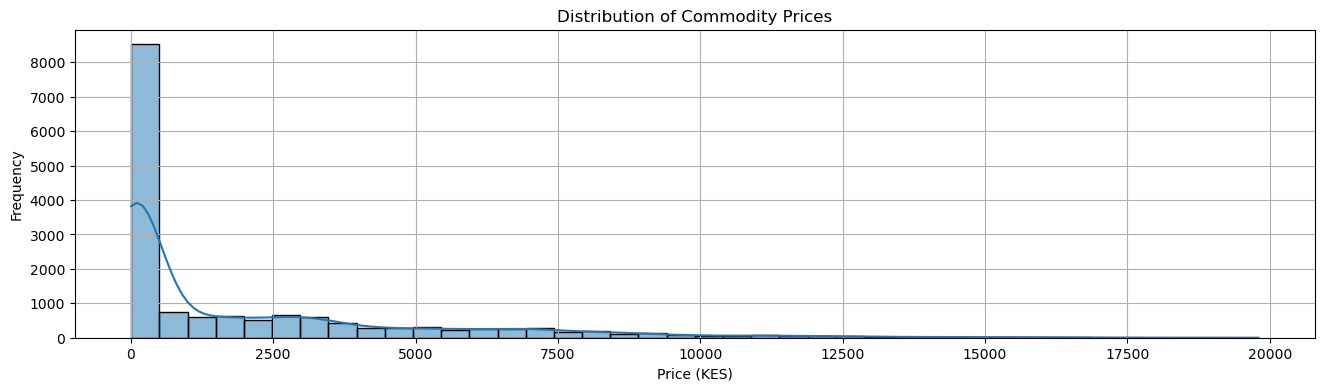

In [11]:
# Plotting the distribution of prices
plt.figure(figsize=(16, 4))
sns.histplot(df['price'], kde=True, bins= 40)
plt.title('Distribution of Commodity Prices')
plt.xlabel('Price (KES)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The histogram shows a highly right-skewed distribution. This suggests that most commodity prices are on the lower end, with a few commodities having significantly higher prices.

The presence of a long tail indicates substantial variation in prices, with a small number of commodities being much more expensive than the majority.

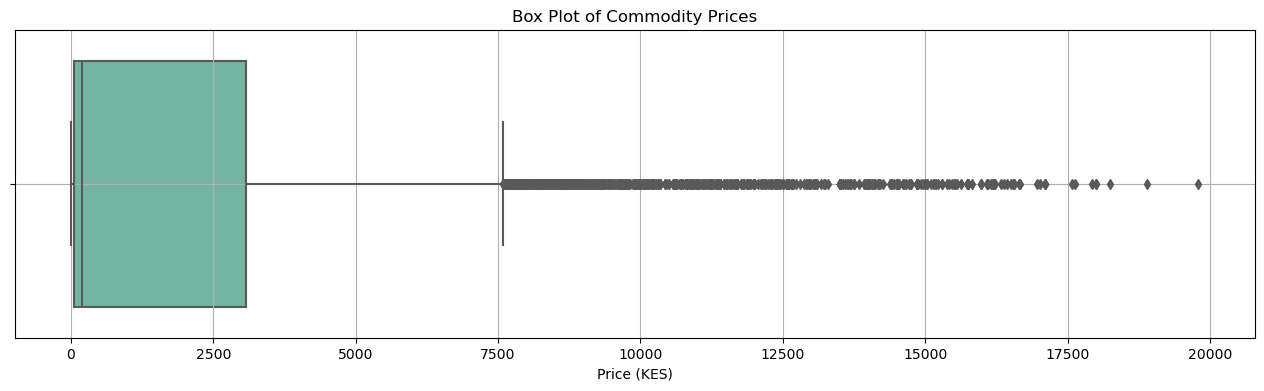

In [12]:
# Boxplot for commodity prices to identify outliers
plt.figure(figsize = (16, 4))
sns.boxplot(x = df['price'], palette = 'Set2')
plt.title('Box Plot of Commodity Prices')
plt.xlabel('Price (KES)')
plt.grid()
plt.show()

The box plot further illustrates the skewness in the data with many outliers on the higher end. These outliers represent commodities with exceptionally high prices.
The median price (indicated by the line inside the box) is relatively low compared to the maximum price, reinforcing the notion of a skewed distribution.

### Comodity Frequencies
Let's create a bar plot to show the frequency of different commodities in the dataset. This will help us understand which commodities are most common and might be of greater interest for further analysis. ​

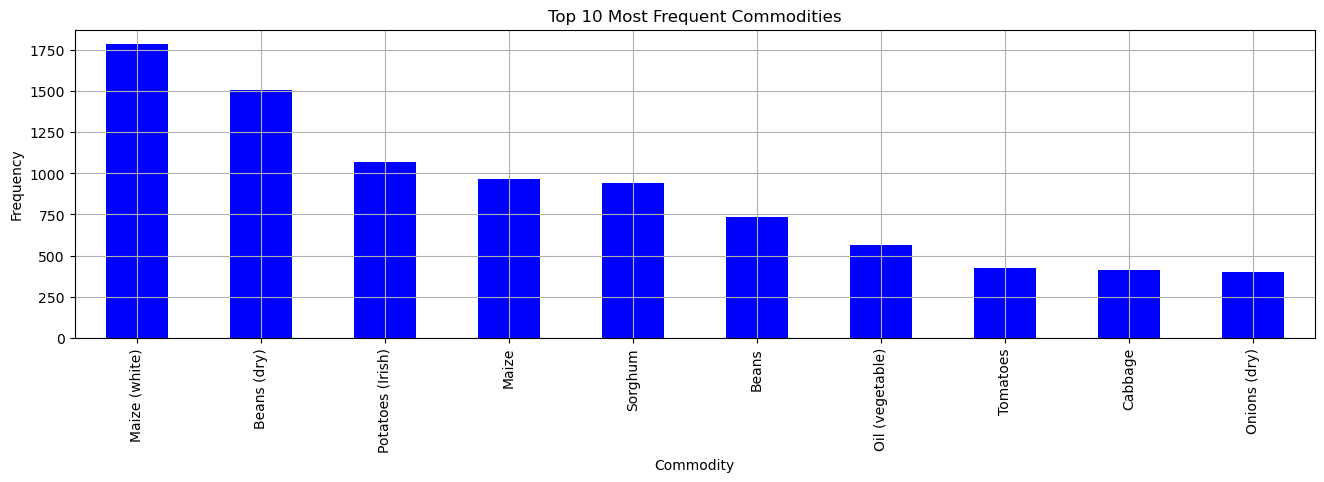

In [13]:
# Top 10 most frequent commodities in the dataset
top_commodities = df['commodity'].value_counts().head(10)

plt.figure(figsize=(16, 4))
top_commodities.plot(kind='bar', color='blue')
plt.title('Top 10 Most Frequent Commodities')
plt.xlabel('Commodity')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### District Distribution Analysis

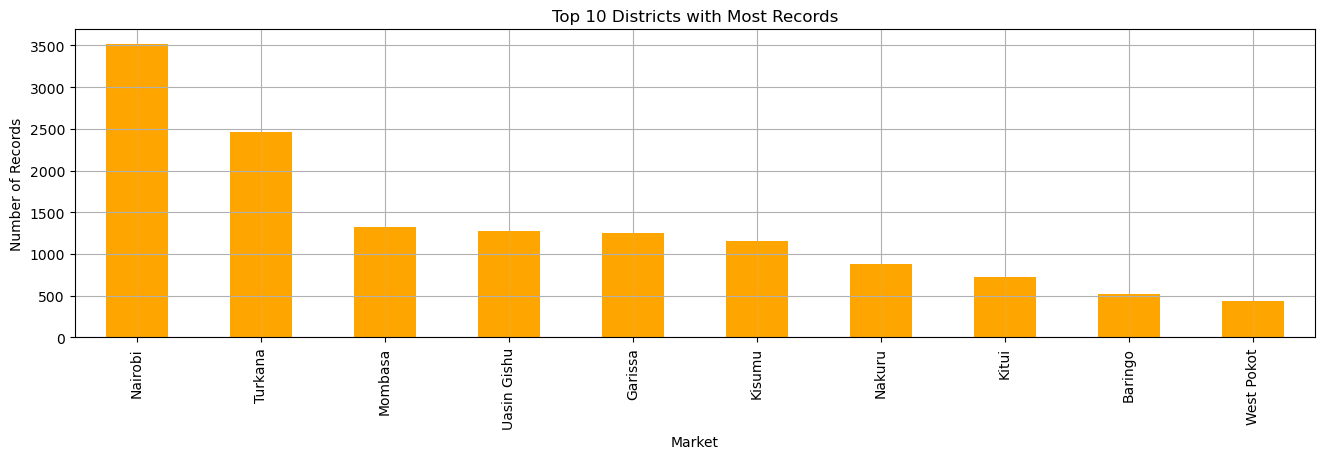

In [14]:
# Re-running the code for Top 10 districts with the most records in the dataset
top_markets = df['district'].value_counts().head(10)

plt.figure(figsize=(16, 4))
top_markets.plot(kind='bar', color='orange')
plt.title('Top 10 Districts with Most Records')
plt.xlabel('Market')
plt.ylabel('Number of Records')
plt.xticks(rotation=90)
plt.grid()
plt.show()


From this analysis we can see the top 10 districts with the most records in the dataset.
* Markets like **Nairobi**, **Turkana**, **Mombasa** and **Uasin Gishu** are among the most represented, indicating either their larger market size or more frequent data collection.

* This distribution helps in understanding which markets are most prominent in the dataset, which is important for evaluating the representativeness of our analysis and identifying any potential gaps in market coverage.

## Bivariate Analysis
In this section, we'll explore relationships between two variables at a time. This can provide insights into how different variables interact with each other, which is particularly useful for understanding the dynamics of commodity prices in relation to other factors.

###  **Commodity vs. Price**
We'll start by analyzing the commodity prices have changed per variation. Before we do,  We first check the number and type of commodities we have. 

In [15]:
# Checking for the value counts of each commodity.
df["commodity"].value_counts().sort_index(ascending=True)

commodity
Bananas                       327
Beans                         732
Beans (dolichos)              217
Beans (dry)                  1510
Beans (kidney)                107
Beans (mung)                   56
Beans (rosecoco)              240
Beans (yellow)                359
Bread                         178
Cabbage                       411
Cooking fat                   123
Cowpea leaves                  40
Cowpeas                       206
Fish (omena, dry)              24
Fuel (diesel)                  67
Fuel (kerosene)                67
Fuel (petrol-gasoline)         67
Kale                          387
Maize                         964
Maize (white)                1785
Maize (white, dry)            328
Maize flour                   387
Meat (beef)                   219
Meat (camel)                  122
Meat (goat)                   174
Milk (UHT)                    356
Milk (camel, fresh)            78
Milk (cow, fresh)              18
Milk (cow, pasteurized)       178
Mill

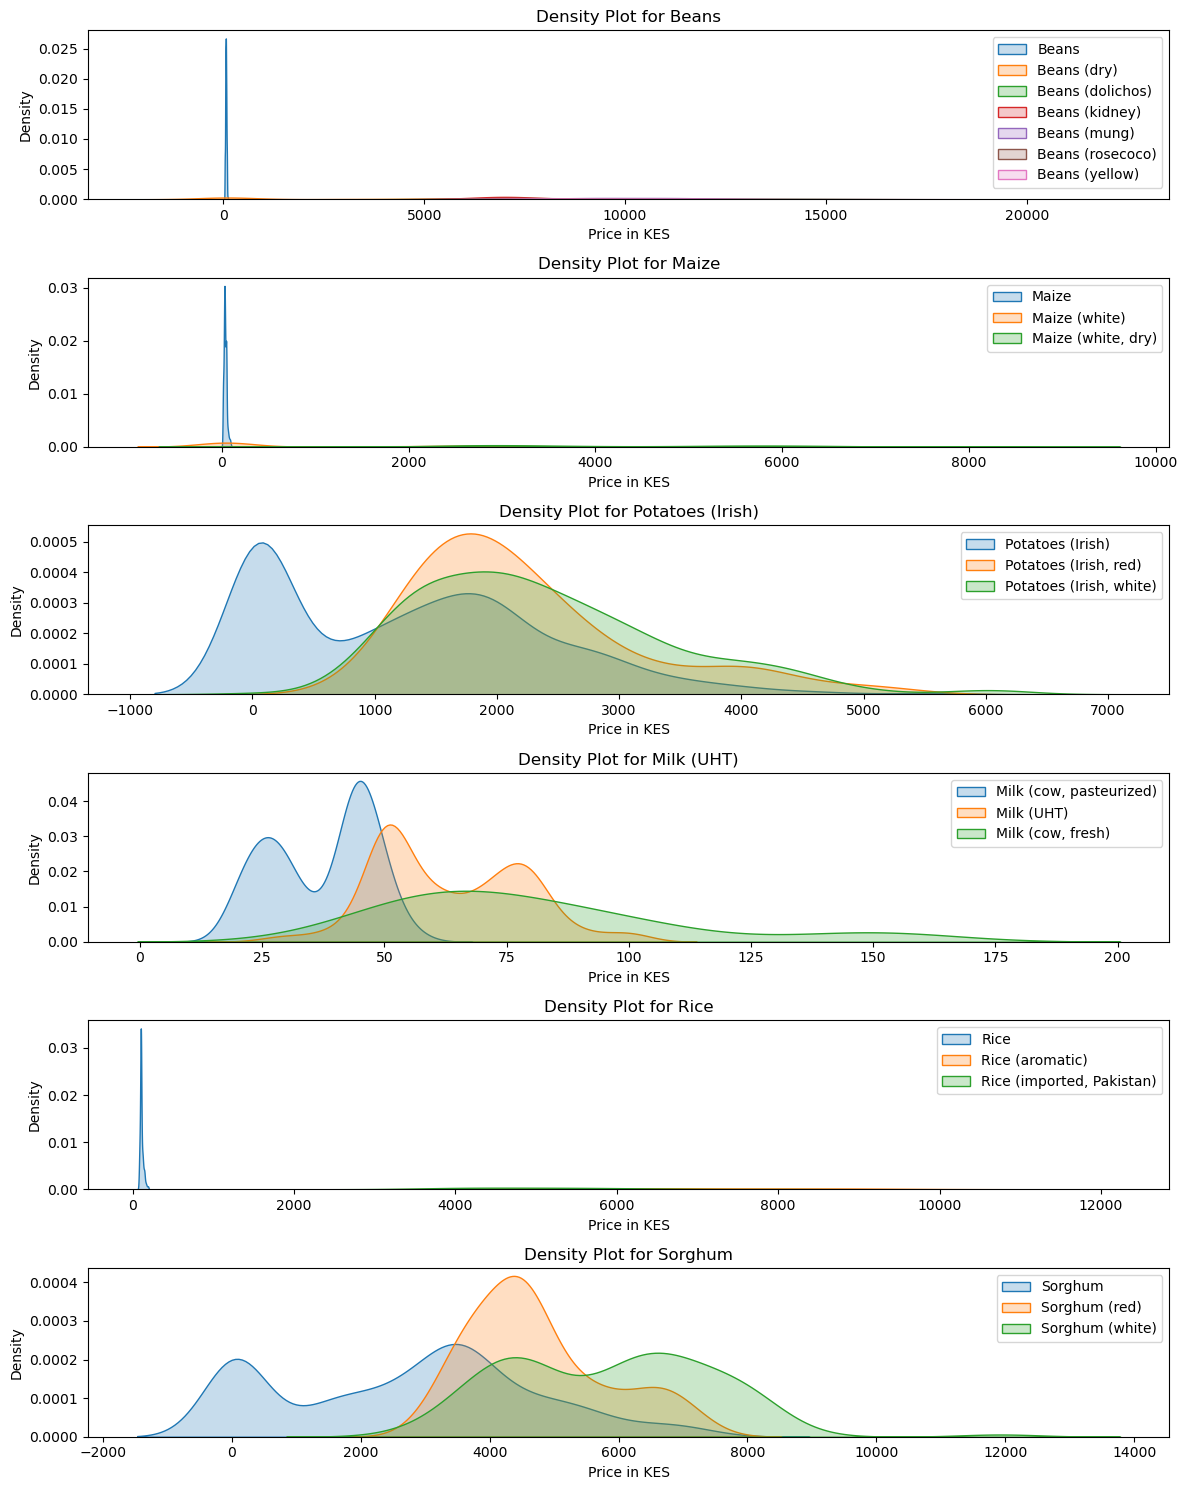

In [16]:
# List of commodity pairs/groups for comparison
commodity_groups = {
    'Beans': ['Beans', 'Beans (dry)', 'Beans (dolichos)','Beans (kidney)',
              'Beans (mung)','Beans (rosecoco)','Beans (yellow)'],
    
    'Maize': ['Maize', 'Maize (white)', 'Maize (white, dry)'],
    'Potatoes (Irish)': ['Potatoes (Irish)', 'Potatoes (Irish, red)', 
                         'Potatoes (Irish, white)'],
    
    'Milk (UHT)': ['Milk (cow, pasteurized)', 'Milk (UHT)', 
                   'Milk (cow, fresh)'],
    
    'Rice': ['Rice', 'Rice (aromatic)', 'Rice (imported, Pakistan)'],
    'Sorghum': ['Sorghum', 'Sorghum (red)', 'Sorghum (white)'],
  
}

# density plots for each commodity group
plt.figure(figsize=(12, 15))
for i, (group_name, commodities) in enumerate(commodity_groups.items(), 1):
    plt.subplot(len(commodity_groups), 1, i)
    for commodity in commodities:
        subset = df[df['commodity'] == commodity]
        sns.kdeplot(subset['price'], label=commodity, shade=True)
    plt.title(f'Density Plot for {group_name}')
    plt.xlabel('Price in KES')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

We'll go on to merge the commodities in order to simply our analysis moving on for a general analysis, the goal is to simplify the dataset while still capturing the essence of market variations.

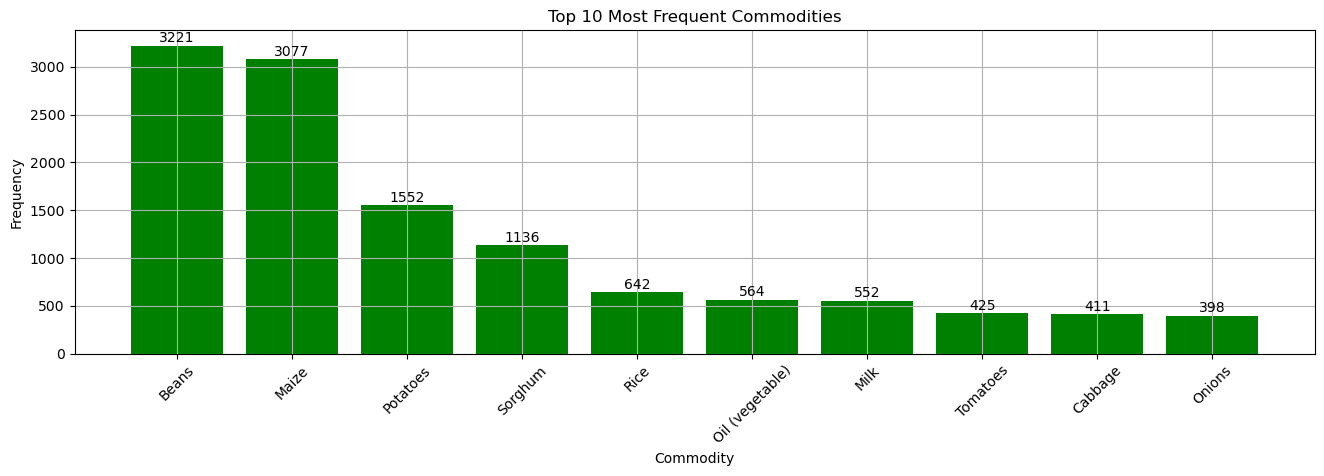

In [17]:
# Defining the mapping of variants to general categories
commodity_replacement = {
    'Beans (dry)': 'Beans',
    'Beans (kidney)': 'Beans',
    'Beans (rosecoco)': 'Beans',
    'Beans (yellow)': 'Beans',
    'Beans (dolichos)': 'Beans',
    'Beans (mung)': 'Beans',
    'Maize (white)': 'Maize',
    'Maize (white, dry)': 'Maize',
    'Potatoes (Irish)': 'Potatoes',
    'Potatoes (Irish, red)': 'Potatoes',
    'Potatoes (Irish, white)': 'Potatoes',
    'Rice (imported, Pakistan)':'Rice',
    'Rice (aromatic)' : 'Rice',
    'Sorghum (white)' : 'Sorghum',
    'Sorghum (red)' : 'Sorghum',
    'Onions (red)' : 'Onions',
    'Onions (dry)': 'Onions',
    'Milk (cow, pasteurized)':'Milk',
    'Milk (UHT)' : 'Milk',
    'Milk (cow, fresh)' : 'Milk'   
}

# Updating the 'commodity' column by replacing variant names with the general category name
df['commodity'] = df['commodity'].replace(commodity_replacement)

# Confirming the changes
# Plotting the bar chart with value counts
plt.figure(figsize=(16, 4.2))
top_commodities = df['commodity'].value_counts().head(10)
bars = plt.bar(top_commodities.index, top_commodities.values, color='green')

# Adding the text with the value counts above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.title('Top 10 Most Frequent Commodities')
plt.xlabel('Commodity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# Setting the date to index
df.set_index('date', inplace=True)

# Get the list of unique commodities
commodities = df['commodity'].unique()

# Calculating the number of rows for the subplots
num_rows = len(commodities) // 2 + (len(commodities) % 2 > 0)

# Setting up the matplotlib figure
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 5 * num_rows), sharex=True)

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Plotting each commodity's price over time in a subplot
for i, commodity in enumerate(commodities):
    sns.lineplot(data=df[df['commodity'] == commodity]['price'], ax=axes[i])
    axes[i].set_title(commodity)
    axes[i].set_ylabel('Price in KES')

# Remove any unused subplots if commodities are an odd number
if len(commodities) % 2:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show();

From this visualization, we can see that not all the commodity prices have been recorded since 2006.
In order to reduce noise, We will go ahead and drop all the commodities that have not been recorded since 2006 

In [ ]:
# Filtering data to include only commodities with records starting from 2006 or earlier
commodities_since_2006 = df[df.index.year <= 2006]['commodity'].unique()

# Now filtering main dataframe to include only these commodities
filtered_data = df[df['commodity'].isin(commodities_since_2006)]

# After filtering we check the unique commodities and their counts again
filtered_commodity_counts = filtered_data['commodity'].value_counts()
filtered_commodity_counts 

In [ ]:
# Getting the list of unique commodities after filtering
commodities = filtered_data['commodity'].unique()

# Calculating the number of rows for the subplots
num_rows = len(commodities) // 2 + (len(commodities) % 2)

# Setying up the matplotlib figure
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 5 * num_rows), sharex=True)

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Ploting each commodity's price over time in a subplot
for i, commodity in enumerate(commodities):
    sns.lineplot(data=filtered_data[filtered_data['commodity'] == commodity]['price'], ax=axes[i])
    axes[i].set_title(commodity)
    axes[i].set_ylabel('Price in KES')
    axes[i].set_xlabel('Date')

plt.tight_layout()
plt.show();

Great. Now that we have commoditie with substatial data, we can proceed to the next level of our analysis.

### **Price vs. District**
Next, we'll examine the relationship between commodity prices and different districts. This can highlight regional price variations.

In [ ]:
# Selecting the commodities for visualization
key_commodities = ['Maize', 'Beans', 'Potatoes', 'Sorghum', 'Oil (vegetable)', 'Milk', 'Bread' ]

# Seting up the matplotlib figure - adjust the size as needed
num_rows = len(key_commodities)
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(16, 4*num_rows))

# Flattening the axes array if it's multidimensional
axes = axes.flatten() if num_rows > 1 else [axes]

# box plots for each commodity's price across districts
for i, commodity in enumerate(key_commodities):
    sns.boxplot(data=filtered_data[filtered_data['commodity'] == commodity], x='district', y='price', ax=axes[i])
    axes[i].set_title(f'Price Distribution of {commodity} Across Districts')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_ylabel('Price in KES')
    axes[i].set_xlabel('District')

plt.tight_layout()
plt.show();

from this analysis, We cans see that 
* **Maize** prices vary widely across districts, with some having higher median prices and greater variability, suggesting regional factors influence prices. 
* **Beans** also exhibit significant variation, indicating occasional spikes possibly due to seasonal shortages. 
* **Potato** prices are relatively consistent across districts, with occasional outliers indicating price surges. 
* **Sorghum** prices vary notably, reflecting regional differences in its importance. 
* **Vegetable oil** prices are relatively uniform, but some districts show greater price ranges. 
* **Milk prices** show less variability, suggesting a more consistent supply chain, though occasional fluctuations occur. 
* **Limited data on bread** prices hinders comparative district analysis so we will go on and drop the commodity all together

In [ ]:
# Filtering and maintaining rows where the commodity is not "Bread"
filtered_data = filtered_data[filtered_data['commodity'] != 'Bread']
filtered_commodity_counts = filtered_data['commodity'].value_counts()
filtered_commodity_counts 

### Unit vs Commodity 
Next we'll analyse our data to understand how many different units we have recorderd per each commodity.

In [ ]:
# Grouping for analysis
unit_analysis = filtered_data.groupby(['commodity', 'unit']).size().reset_index(name='count')

# Sorting the results for better readability
unit_analysis = unit_analysis.sort_values(by=['commodity', 'count'], ascending=[True, False])

# Displaying the dataframe
unit_analysis

* **Beans:** The majority of bean prices are recorded in '90 KG' units, followed by 'KG'. This suggests that beans are commonly traded in bulk.

* **Maize:** Maize prices are commonly reported in both 'KG' and '90 KG', with more records in 'KG'. This reflects the different market segments (retail vs. wholesale).

* **Milk:** Milk is primarily measured in '500 ML' units, with very few records in 'L' and '200 ML'. The dominance of the '500 ML' unit indicates standard packaging size for milk.

* **Oil (Vegetable):** All records for vegetable oil are in liters, which indicates consistency in the unit of measurement for vegetable oil.

* **Potatoes:** Potatoes also have a significant number of records in '50 KG' suggesting bulk trade, but there are also a substantial number of records in 'KG' which might represent smaller purchases or retail sales.

* **Sorghum:** The unit '90 KG' is used for most of the sorghum records, with fewer in 'KG'. This is indicative of wholesale trade for sorghum.

To compare prices across all commodities we'll need to standardize the units of measure. For solid commodities like beans, maize, and sorghum, 'KG' could be the standard unit. For the liquids, 'L' (liter) could be the standard.

In [ ]:
# Defining the conversion factors
conversion_factors = {
    '90 KG': 1/90,   # Converting prices for 90 KG to price per KG
    'KG': 1,         # No conversion needed
    '500 ML': 2,     # Converting prices for 500 ML to price per L
    'L': 1,          # No conversion needed
    '50 KG': 1/50,   # Converting prices for 50 KG to price per KG
    '200 ML': 5      # Converting prices for 200 ML to price per L
}

# Applying the conversion factors to create a new 'standardized_price' column
filtered_data['standardized_price'] = filtered_data.apply(
    lambda row: row['price'] * conversion_factors.get(row['unit'], 1), axis=1
)
filtered_data = filtered_data.reset_index()
filtered_data = filtered_data.rename(columns={"index":'date'})

# Saving the updated DataFrame to a new CSV file
#filtered_data.to_csv('Data/filtered_data.csv', index=True)

# Sampling the data to confirm the changes
filtered_data.sample(10)

In [ ]:
# Plotting the distribution of prices
plt.figure(figsize=(16, 5))
sns.histplot(filtered_data['standardized_price'], kde=True, bins= 40)
plt.title('Distribution of standardized_prices')
plt.xlabel('Price (KES)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

###  Commodity vs  PriceType
Next we'll analyse our data to understand the pricetype distribution per each commodity.

In [ ]:
# Grouping the data by commodity and price type
price_type_analysis = filtered_data.groupby(['commodity', 'pricetype']).size().reset_index(name='count')

# Sorting the results for better readabilityc
price_type_analysis = price_type_analysis.sort_values(by=['commodity', 'count'], ascending=[True, False])

# Checking the results
price_type_analysis

**Beans:** The majority of price records for beans are for wholesale prices, which are more than three times the records for retail prices. This suggests that beans are commonly traded in bulk, and wholesale prices are more frequently reported.

**Maize:** Wholesale prices for maize also have a higher count compared to retail, but the difference is not as pronounced as with beans. This indicates a significant presence of maize in both wholesale and retail markets.

**Milk:** All price records for milk are retail, indicating that the dataset might be capturing consumer prices rather than bulk trading prices.

**Oil (Vegetable):** Similar to milk, all records for vegetable oil are retail prices, suggesting the data reflects end-consumer pricing.

**Potatoes:** The count of wholesale price records is significantly higher than retail for potatoes, indicating a focus on bulk trade within the dataset for this commodity.

**Sorghum:** Wholesale price records outnumber retail ones.

### Temporal Analysis:
Now we'll check how the standardized prices of commodities fluctuate over time due to various factors such as seasonality, demand, broader economic conditions and supply changes.

In [ ]:
#Setting the date column to be the index
filtered_data.set_index('date', inplace=True)

# Grouping by 'commodity' and resample to get monthly means
grouped = filtered_data.groupby('commodity').resample('M')['standardized_price'].mean()

# Resetting the index
grouped = grouped.reset_index()

# Plotting each commodity
commodities = grouped['commodity'].unique()
for commodity in commodities:
    plt.figure(figsize=(16, 2))
    sns.lineplot(
        data=grouped[grouped['commodity'] == commodity],
        x='date',
        y='standardized_price'
    )
    plt.title(f'Standardized Monthly Prices of {commodity} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Standardized Price')
    plt.grid()
    plt.show()
    
filtered_data = filtered_data.reset_index()
filtered_data.rename(columns={"index":'date'})

In [ ]:
filtered_data.head()

The visualizations indicate both **seasonal patterns and long-term trends** in the prices of commodities. These patterns are critical for any predictive modeling efforts.
The fluctuations and trends can be influenced by a variety of factors including **market demand**, **supply chain issues**, **seasonal harvests**, and **broader economic conditions**.
Our predictive model will need to account for these temporal dynamics.

### Outlier Detection:
Next we analyse our data to Identify any outliers since they can distort predictive modeling and can be indicative of data entry errors, unusual market conditions, or true price spikes.

In [ ]:
# Creating a function to calculate IQR and identify outliers
def detect_outliers_iqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    return outliers

# We will now apply this function to each commodity group in our dataset
outliers_by_commodity = {}

for commodity in filtered_data['commodity'].unique():
    commodity_data = filtered_data[filtered_data['commodity'] == commodity]['standardized_price']
    outliers = detect_outliers_iqr(commodity_data)
    outliers_by_commodity[commodity] = outliers

# Displaying the outliers for each commodity
for commodity, outliers in outliers_by_commodity.items():
    print(f"Outliers for {commodity}:")
    print(outliers)
    print("\n")

* **Maize:** Numerous outliers observed between 2013 and 2023, with notable spikes in 2017 and 2023.
Potential indicators of market stress, supply issues, or external factors impacting prices.
* **Beans:** Outliers concentrated in 2021 and 2023, reaching up to 220 units.
Suggestive of high demand or reduced supply, prompting further investigation into market conditions.
* **Potatoes:** Outliers across multiple years, highest prices recorded in 2018 and 2023.
Persistent outliers indicate recurring factors affecting the potato market, potentially linked to seasonal weather impacts.
* **Sorghum:** Fewer outliers compared to other commodities, significant spikes in 2021 and 2023.
* **Milk:** No outliers detected, indicating consistent milk prices without extreme spikes or dips.
* **Oil (Vegetable):** Sporadic outliers across the dataset's timeline, significant spikes in 2018, 2022, and 2023.
Possibly linked to global oil prices or shifts in trade policies, as vegetable oil prices are influenced by international markets.

* **Limitations**: Price trends in the different Districts could be affected by multiple factore includung demand and supply and Transport and Production cost.   

In [ ]:
nested_dict = {}


for a in range(0, len(filtered_data['pricetype'].unique())):
    pricetype_name = filtered_data['pricetype'].unique()[a]
    nested_dict[pricetype_name] = {}
    df_pricetype = filtered_data[filtered_data['pricetype']==pricetype_name]
    
    for b in range(0, len(df_pricetype['district'].unique())):
        region_name = df_pricetype['district'].unique()[b]
        nested_dict[pricetype_name][region_name] = {}

        df_region = df_pricetype[df_pricetype['district'] == region_name]

        
        for d in range(0, len(df_region['commodity'].unique())):
            item_name = df_region['commodity'].unique()[d]
            nested_dict[pricetype_name][region_name][item_name] = df_region[df_region['commodity'] == item_name]

            
# Access nested_dict as needed
nested_dict.keys()

In [ ]:
# Iterate through price types
for pricetype_name, pricetype_data in nested_dict.items():
    
    # Get a list of all unique commodities for the current price type
    unique_commodities = set(commodity for region_data in pricetype_data.values() for commodity in region_data.keys())
    
    # Iterate through unique commodities
    for commodity_name in unique_commodities:
        
        # Create an empty DataFrame to accumulate data for the current commodity
        df_commodity = pd.DataFrame()
        
        # Iterate through regions
        for region_name, region_data in pricetype_data.items():
            
            # Check if the commodity exists in the current region
            if commodity_name in region_data:
                # Append data for the current commodity in the current region to the DataFrame
                df_commodity = df_commodity.append(region_data[commodity_name], ignore_index=True)
        
        # Check if the DataFrame is not empty and contains 'date' and 'price' columns
        if not df_commodity.empty and 'date' in df_commodity.columns and 'price' in df_commodity.columns:
            # Plotting
            plt.figure(figsize=(16, 2))
            sns.lineplot(
                data=df_commodity,
                x='date',
                y='standardized_price',
                label=pricetype_name
            )
            plt.title(f' {pricetype_name} price for {commodity_name}')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.grid()
            plt.show()
        else:
            print(f"Skipping plot for {commodity_name} ({pricetype_name}): Empty or missing 'date'/'price' columns.")
